### This file is a continuation of Part 1A:
### Contents:
    06. Customer profiling for marketing strategies 
        b. Customer profiling based on age
        c. Customer profiling based on gender
        d. Customer profiling based on income
        e. Customer profiling based on family/marital status, income and number of customer
        f. Customer profiling orders based on family/marital status
        g. Customer profiling orders based on income
        h. Customer profiling based on number of order and sales
    07. Product 
    08. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
    09. Comparing customer profiles with regions and departments
    10. Export visualizations as image files

Importing libraries and data

In [2]:
# Importing all required libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import gc

In [3]:
# Defining the path

path = r'C:\Users\nukis\Documents\Instacart Basket Analysis'

In [4]:
# Importing the final version of the dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_ver2.pkl'))

In [5]:
# Command to maximize view of rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = len(df.columns)

In [6]:
# Formatting decimal number

pd.set_option('display.float_format', '{:,.1f}'.format)

In [6]:
departments = ['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing']

In [63]:
gc.collect()

0

#### 6. Customer profiling for marketing strategies 

#### 6a. Customer profiling based on age

In [29]:
df['age'].describe().round(decimals = 2)

count   30,964,564.0
mean            49.5
std             18.5
min             18.0
25%             33.0
50%             49.0
75%             65.0
max             81.0
Name: age, dtype: float64

With mean and median close to each other, it is expected that the customer distribution based on age will show normal-distribution like.

Text(0.5, 0, 'Customer age')

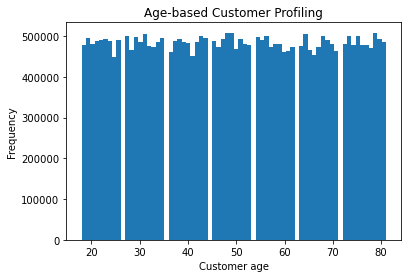

In [30]:
df['age'].plot.hist(bins = 70)

plt.title('Age-based Customer Profiling')
plt.xlabel('Customer age')

In [32]:
# Grouping the age. Here, 15years is included to represent equal classification (10 years for each group),
# despite the fact that 18 years of age is the youngest customer.

df.loc[(df['age'] >= 15) & (df['age'] <= 24), 'age_group'] = '15-24'
df.loc[(df['age'] >= 25) & (df['age'] <= 34), 'age_group'] = '25-34'
df.loc[(df['age'] >= 35) & (df['age'] <= 44), 'age_group'] = '35-44'
df.loc[(df['age'] >= 45) & (df['age'] <= 54), 'age_group'] = '45-54'
df.loc[(df['age'] >= 55) & (df['age'] <= 64), 'age_group'] = '55-64'
df.loc[(df['age'] >= 65) & (df['age'] <= 74), 'age_group'] = '65-74'
df.loc[(df['age'] >= 75) & (df['age'] <= 84), 'age_group'] = '75-84'

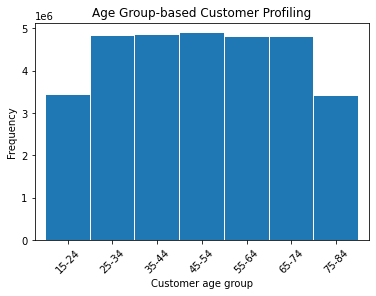

In [33]:
# Creating bar chart for frequency distribution of age group

age_group_range = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

bar_group_range = df['age_group'].value_counts().loc[age_group_range].plot(kind = 'bar', width = 0.98)
plt.title('Age Group-based Customer Profiling')
plt.xlabel('Customer age group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show();

#### 6b. Customer profiling based on gender

In [123]:
df['gender'].value_counts()

Male      15586740
Female    15377824
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender-based Customer')

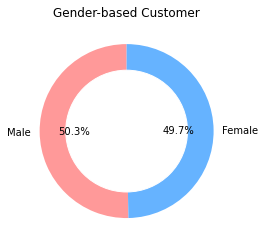

In [124]:
labels = 'Male', 'Female'
colors = ['#ff9999', '#66b3ff']


pie_gender_group = df['gender'].value_counts().plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Gender-based Customer')

#### 6c. Customer profiling based on income

In [128]:
df['income'].describe().round(decimals = 2)

count   30,964,564.0
mean        99,675.9
std         43,141.9
min         25,903.0
25%         67,292.0
50%         96,765.0
75%        128,102.0
max        593,901.0
Name: income, dtype: float64

Text(0.5, 0, 'Income - USD')

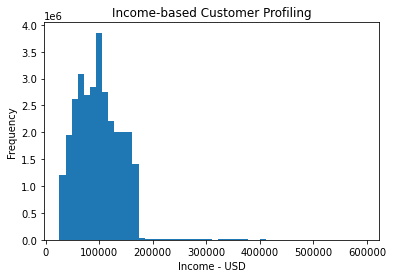

In [130]:
# Creating histogram for frequency distribution of income

hist_income = df['income'].plot.hist(bins = 50)

plt.title('Income-based Customer Profiling')
plt.xlabel('Income - USD')

#### 6d. Customer profiling orders based on family/marital status

In [143]:
# This analysis aims to answer if how customer family status influence average number of orders they placed

orders_per_famstats = df.groupby('marital_status').agg({'order_number': 'mean'})
orders_per_famstats = orders_per_famstats.rename(columns = {'order_number': 'number_of_order'})
orders_per_famstats = orders_per_famstats.sort_values(by = 'number_of_order', ascending = False).reset_index()
orders_per_famstats

,marital_status,number_of_order
0,living with parents and siblings,18.0
1,divorced/widowed,18.0
2,single,17.9
3,married,17.8


Text(0, 0.5, '')

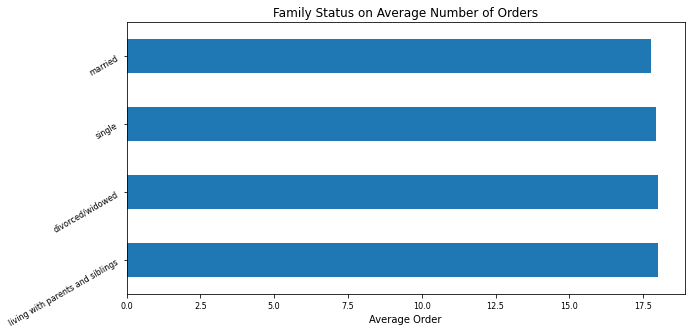

In [172]:
hist_orders_per_famstats = orders_per_famstats.plot.barh(x='marital_status', rot=30, fontsize=8, figsize=(10,5), legend=False)

plt.title('Family Status on Average Number of Orders')
plt.xlabel('Average Order')
plt.ylabel('')

The bar chart above shows that family status does not influence the average number of orders that customer placed which could mean that our products reach all family models.

#### 6e. Customer profiling orders based on income

In [175]:
# This analysis aims to answer if there is a relationship between customer income and orders they place

income_order = df.groupby('user_id').agg({'income': 'mean', 'order_number': 'sum'}).reset_index()
income_order.head(10)

,user_id,income,order_number
0,1,"40,423.0",343.0
1,2,"64,940.0","1,567.0"
2,3,"93,240.0",528.0
3,4,"45,435.0",52.0
4,7,"89,095.0","1,987.0"
5,10,"52,716.0",461.0
6,11,"162,213.0",386.0
7,12,"167,293.0",263.0
8,13,"106,926.0",561.0
9,14,"95,137.0","1,547.0"


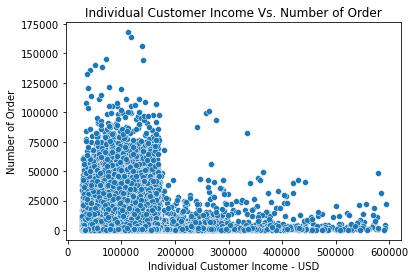

In [209]:
# Creating bar chart for average income based on family status

scat_income_order = sns.scatterplot(x = 'income', y = 'order_number', data = income_order)

plt.title('Individual Customer Income Vs. Number of Order')
plt.xlabel('Individual Customer Income - USD')
plt.ylabel('Number of Order')
plt.show();

The scatter plot shows that there is no relationship between number of orders that customer placed and their corresponding income.
It is however revealed, that most orders are placed by customers who earn less than 200,000 USD. It is also linked to our previous finding that the majority of our customers have family status of married with average income of 100,000 USD.

#### 6f. Customer profiling based on family/marital status, income and number of customer 

In [132]:
income_per_famstats = df.groupby('marital_status').agg({'income': 'mean', 'user_id': 'nunique'})
income_per_famstats = income_per_famstats.rename(columns = {'income': 'avg_income', 'user_id': 'total_customer'})
income_per_famstats.sort_values(by = ['avg_income', 'total_customer'], ascending = False).reset_index()

,marital_status,avg_income,total_customer
0,divorced/widowed,"115,969.8",13831
1,married,"101,559.4",114296
2,single,"91,550.9",26896
3,living with parents and siblings,"70,870.4",7608


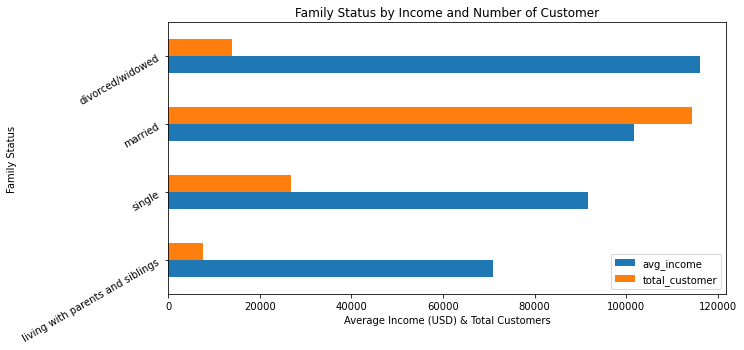

In [187]:
# Creating bar chart for average income based on family status

bar_income_per_famstats = income_per_famstats.sort_values(by = 'avg_income').plot.barh(figsize=(10,5), rot=30)

plt.title('Family Status by Income and Number of Customer')
plt.xlabel('Average Income (USD) & Total Customers')
plt.ylabel('Family Status')
plt.show();

The bar chart above shows that the majority of our customers have family status of married with average income of 100,000 USD.

#### 6g. Customer profiling based on brand loyalty

In [7]:
cust_per_region = df.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False).reset_index()
cust_per_region.rename(columns = {'user_id': 'number_of_customers'}, inplace = True)
cust_per_region

,region,number_of_customers
0,South,54193
1,West,41481
2,Midwest,38376
3,Northeast,28581


Text(0.5, 1.0, 'Region-Based Customer Composition')

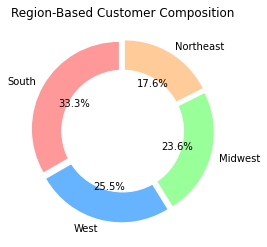

In [14]:
# Creating customer composition

labels = 'South', 'West', 'Midwest', 'Northeast'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

pie_cust_per_region = cust_per_region['number_of_customers'].plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Region-Based Customer Composition' )

In [289]:
cust_dist = df.groupby('loyalty_flag').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False).reset_index()
cust_dist

,loyalty_flag,user_id
0,Regular customer,76864
1,New customer,68750
2,Loyal customer,17017


Text(0.5, 1.0, 'Customer Composition on Brand Loyalty')

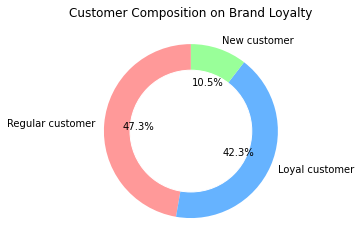

In [290]:
# Creating customer distribution by order

labels = 'Regular customer', 'Loyal customer', 'New customer'
colors = ['#ff9999', '#66b3ff', '#99ff99']


pie_cust_dist = cust_dist['user_id'].plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Customer Composition on Brand Loyalty' )

In [291]:
cust_dist2 = df['loyalty_flag'].value_counts().sort_values(ascending = False).reset_index()
cust_dist2

,index,loyalty_flag
0,Regular customer,15876776
1,Loyal customer,10284093
2,New customer,4803695


Text(0.5, 1.0, 'Order by Brand Loyalty')

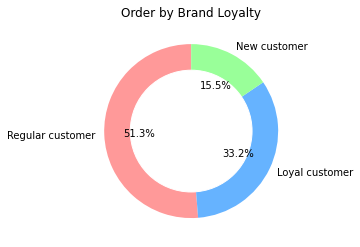

In [292]:
# Creating customer distribution 

labels = 'Regular customer', 'Loyal customer', 'New customer'
colors = ['#ff9999', '#66b3ff', '#99ff99']


pie_cust_dist2 = cust_dist2['loyalty_flag'].plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Order by Brand Loyalty')

#### 6h. Customer profiling based on number of order and sales

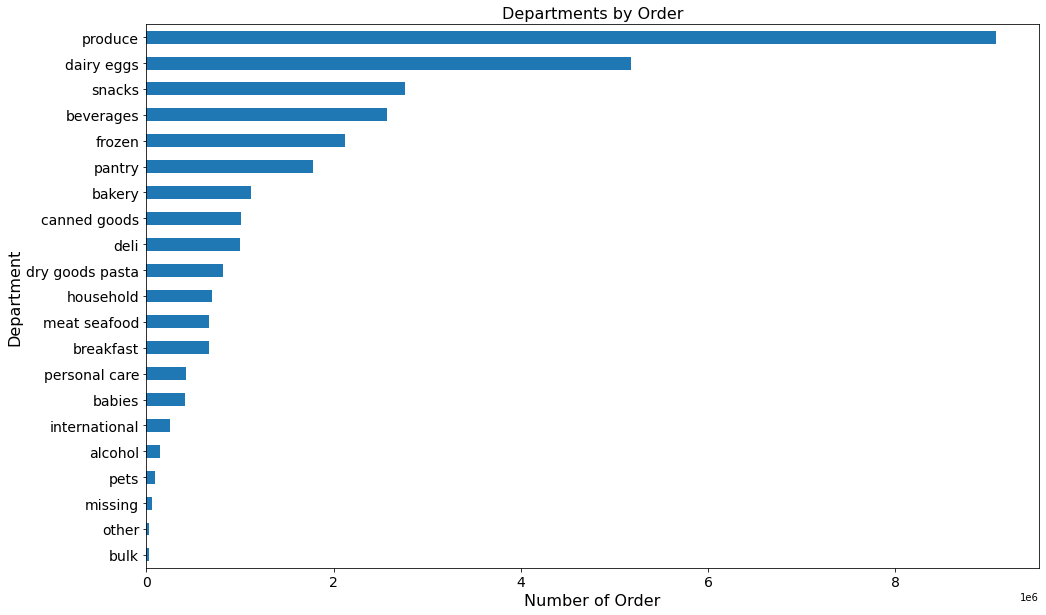

In [200]:
# Discovering which department has the most order

bar_orders_per_depts = df['department'].value_counts().sort_values().plot.barh(figsize=(16,10), fontsize=14)
plt.title('Departments by Order', fontsize=16)
plt.xlabel('Number of Order', fontsize=16)
plt.ylabel('Department', fontsize=16)
plt.show();

Produce is a generalized term for many farm-produced crops, including fruits and vegetables (grains, oats, etc. are also sometimes considered produce). More specifically, the term produce often implies that the products are fresh and generally in the same state as where and when they were harvested.

In [192]:
# Discovering which department earns the highest profit

sales_per_depts = df.groupby('department', sort=False).agg({'prices': ['min', 'max', 'mean', 'sum']})
sales_per_depts.columns = sales_per_depts.columns.droplevel(0)
sales_per_depts = sales_per_depts.rename(columns = {'': 'department', 'min': 'price_min', 'max': 'price_max', 'mean': 'price_mean', 'sum': 'total_sales'})
sales_per_depts = sales_per_depts.sort_values(by = 'total_sales', ascending = False).reset_index()
sales_per_depts

,department,price_min,price_max,price_mean,total_sales
0,produce,1.0,15.0,8.0,"72,455,760.0"
1,dairy eggs,1.0,15.0,8.3,"43,118,260.0"
2,beverages,1.0,15.0,7.7,"19,758,774.0"
3,frozen,1.0,15.0,7.7,"16,408,884.0"
4,pantry,1.0,20.0,8.0,"14,287,456.0"
5,snacks,1.6,7.0,4.3,"11,827,920.0"
6,meat seafood,8.0,25.0,16.3,"10,998,953.0"
7,bakery,1.0,15.0,7.9,"8,806,886.0"
8,deli,1.0,15.0,7.8,"7,813,188.0"
9,canned goods,1.0,15.0,7.5,"7,637,778.5"


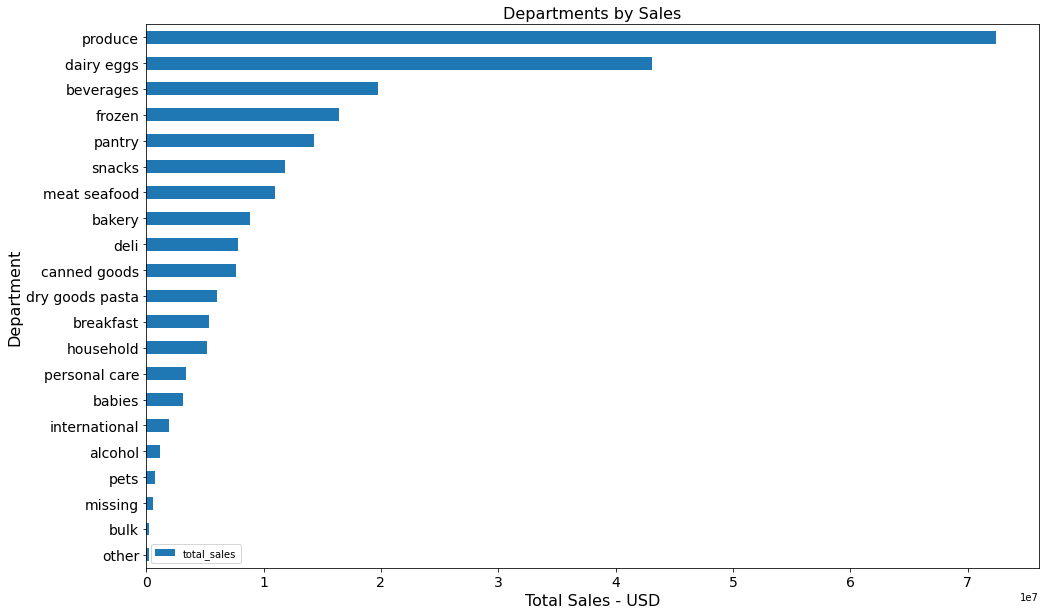

In [201]:
bar_sales_per_depts = sales_per_depts.sort_values(by = 'total_sales', ascending=True).plot.barh(x = 'department', y = 'total_sales', figsize=(16,10), fontsize=14)

plt.title('Departments by Sales', fontsize=16)
plt.xlabel('Total Sales - USD', fontsize=16)
plt.ylabel('Department', fontsize=16)
plt.show();

Looking at two bar charts above, 3 most profitable departments are: dairy eggs, produce and beverages. It is therefor interesting to see which group of customers places those orders.

In [194]:
sales_per_age_group = df.groupby(['department', 'age_group']).agg({'prices': 'sum'})
sales_per_age_group

prices
department      age_group             
alcohol         15-24        141,587.5
                25-34        187,856.5
                35-44        171,961.4
                45-54        195,129.9
                55-64        183,014.5
                65-74        176,140.5
                75-84        123,120.8
babies          15-24        351,305.2
                25-34        471,405.4
                35-44        512,635.1
                45-54        509,594.2
                55-64        475,619.3
                65-74        471,345.3
                75-84        341,191.9
bakery          15-24        974,326.2
                25-34      1,371,995.4
                35-44      1,371,690.6
                45-54      1,389,177.8
                55-64      1,368,401.1
                65-74      1,353,963.9
                75-84        977,331.2
beverages       15-24      2,139,472.5
                25-34      3,065,299.2
                35-44      3,044,212.2
                45-54      3,147,078.5
                55-64      3,101,182.8
                65-74      3,065,452.5
                75-84      2,196,076.2
breakfast       15-24        603,579.0
                25-34        845,580.6
                35-44        833,681.2
                45-54        861,636.5
                55-64        841,147.6
                65-74        811,127.8
                75-84        591,277.5
bulk            15-24         31,218.2
                25-34         43,963.3
                35-44         43,778.6
                45-54         43,970.4
                55-64         41,488.5
                65-74         43,193.4
                75-84         31,600.4
canned goods    15-24        840,486.4
                25-34      1,200,569.8
                35-44      1,193,412.5
                45-54      1,201,742.5
                55-64      1,180,791.4
                65-74      1,188,021.6
                75-84        832,754.3
dairy eggs      15-24      4,780,038.0
                25-34      6,762,624.5
                35-44      6,746,447.0
                45-54      6,785,342.5
                55-64      6,635,850.0
                65-74      6,675,640.0
                75-84      4,732,318.0
deli            15-24        854,777.0
                25-34      1,213,981.6
                35-44      1,232,654.1
                45-54      1,220,338.9
                55-64      1,226,072.0
                65-74      1,201,668.6
                75-84        863,695.9
dry goods pasta 15-24        672,914.5
                25-34        937,118.0
                35-44        943,664.8
                45-54        954,851.3
                55-64        940,693.6
                65-74        928,714.6
                75-84        664,224.6
frozen          15-24      1,808,255.5
                25-34      2,530,583.2
                35-44      2,548,805.2
                45-54      2,615,143.2
                55-64      2,547,033.2
                65-74      2,532,176.2
                75-84      1,826,887.2
household       15-24        567,554.1
                25-34        789,923.6
                35-44        815,851.6
                45-54        816,047.1
                55-64        799,343.7
                65-74        804,952.6
                75-84        571,237.6
international   15-24        215,408.6
                25-34        314,173.8
                35-44        306,827.6
                45-54        310,654.0
                55-64        300,663.0
                65-74        302,455.5
                75-84        215,520.4
meat seafood    15-24      1,223,288.4
                25-34      1,691,336.4
                35-44      1,705,485.2
                45-54      1,721,807.5
                55-64      1,702,255.1
                65-74      1,735,052.8
                75-84      1,219,728.1
missing         15-24         65,216.3
                25-34         88,816.9
                35-44         84,186.5
               

In [195]:
sales_per_age_group2 = sales_per_age_group.unstack()

In [196]:
sales_per_age_group2.reset_index()
sales_per_age_group2.columns = sales_per_age_group2.columns.droplevel(0)
sales_per_age_group2.reset_index()
sales_per_age_group2 = sales_per_age_group2.reset_index(level=0)
sales_per_age_group2

age_group,department,15-24,25-34,35-44,45-54,55-64,65-74,75-84
0,alcohol,"141,587.5","187,856.5","171,961.4","195,129.9","183,014.5","176,140.5","123,120.8"
1,babies,"351,305.2","471,405.4","512,635.1","509,594.2","475,619.3","471,345.3","341,191.9"
2,bakery,"974,326.2","1,371,995.4","1,371,690.6","1,389,177.8","1,368,401.1","1,353,963.9","977,331.2"
3,beverages,"2,139,472.5","3,065,299.2","3,044,212.2","3,147,078.5","3,101,182.8","3,065,452.5","2,196,076.2"
4,breakfast,"603,579.0","845,580.6","833,681.2","861,636.5","841,147.6","811,127.8","591,277.5"
5,bulk,"31,218.2","43,963.3","43,778.6","43,970.4","41,488.5","43,193.4","31,600.4"
6,canned goods,"840,486.4","1,200,569.8","1,193,412.5","1,201,742.5","1,180,791.4","1,188,021.6","832,754.3"
7,dairy eggs,"4,780,038.0","6,762,624.5","6,746,447.0","6,785,342.5","6,635,850.0","6,675,640.0","4,732,318.0"
8,deli,"854,777.0","1,213,981.6","1,232,654.1","1,220,338.9","1,226,072.0","1,201,668.6","863,695.9"
9,dry goods pasta,"672,914.5","937,118.0","943,664.8","954,851.3","940,693.6","928,714.6","664,224.6"


In [197]:
data = (sales_per_age_group2.iloc[[7, 19, 3]]).reset_index().drop('index', axis=1).sort_values(by = '35-44', ascending = False)
data

age_group,department,15-24,25-34,35-44,45-54,55-64,65-74,75-84
1,produce,"7,975,776.5","11,267,075.0","11,394,408.0","11,367,051.0","11,233,086.0","11,250,066.0","7,968,299.5"
0,dairy eggs,"4,780,038.0","6,762,624.5","6,746,447.0","6,785,342.5","6,635,850.0","6,675,640.0","4,732,318.0"
2,beverages,"2,139,472.5","3,065,299.2","3,044,212.2","3,147,078.5","3,101,182.8","3,065,452.5","2,196,076.2"


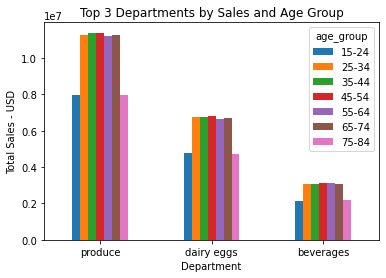

In [198]:
bar_sales_per_age_group = data.plot.bar(x='department', rot=0)

plt.title('Top 3 Departments by Sales and Age Group')
plt.xlabel('Department')
plt.ylabel('Total Sales - USD')
plt.show();

Bar chart above confirms our prior finding that the most active shoppers are customers ranging from 25-74 years of age.

In [272]:
sales_per_dept_region = df.groupby(['region', 'department']).agg({'prices': 'sum'}).unstack()
sales_per_dept_region.columns = sales_per_dept_region.columns.droplevel(0)
sales_per_dept_region = sales_per_dept_region.reset_index()
sales_per_dept_region = sales_per_dept_region.T

new_header = sales_per_dept_region.iloc[0]
sales_per_dept_region = sales_per_dept_region.iloc[1:]
sales_per_dept_region.columns = new_header

sales_per_dept_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,"276,848.1","201,322.4","399,225.3","301,415.3"
babies,"728,255.6","555,544.4","1,069,512.5","779,783.9"
bakery,"2,058,264.6","1,567,480.2","2,917,445.2","2,263,696.0"
beverages,"4,603,243.0","3,557,924.0","6,609,110.5","4,988,496.5"
breakfast,"1,252,947.2","945,090.8","1,794,287.8","1,395,704.4"
bulk,"66,951.1","46,081.8","93,819.0","72,360.9"
canned goods,"1,794,251.1","1,330,925.2","2,550,543.2","1,962,058.9"
dairy eggs,"10,099,573.0","7,621,323.0","14,334,257.0","11,063,107.0"
deli,"1,830,725.0","1,386,006.4","2,596,924.8","1,999,532.0"


In [273]:
new_cols = ['South', 'West', 'Midwest', 'Northeast']
sales_per_dept_region = (sales_per_dept_region[new_cols])
sales_per_dept_region = sales_per_dept_region.sort_values(by = 'South', ascending = False).reset_index()
sales_per_dept_region

region,department,South,West,Midwest,Northeast
0,produce,"24,167,140.0","18,546,192.0","17,034,110.0","12,708,319.0"
1,dairy eggs,"14,334,257.0","11,063,107.0","10,099,573.0","7,621,323.0"
2,beverages,"6,609,110.5","4,988,496.5","4,603,243.0","3,557,924.0"
3,frozen,"5,498,142.5","4,199,414.5","3,846,657.8","2,864,669.0"
4,pantry,"4,744,687.5","3,672,012.5","3,368,091.2","2,502,665.0"
5,snacks,"3,918,338.8","3,045,546.0","2,758,447.5","2,105,588.0"
6,meat seafood,"3,657,937.5","2,836,611.5","2,574,335.8","1,930,068.8"
7,bakery,"2,917,445.2","2,263,696.0","2,058,264.6","1,567,480.2"
8,deli,"2,596,924.8","1,999,532.0","1,830,725.0","1,386,006.4"
9,canned goods,"2,550,543.2","1,962,058.9","1,794,251.1","1,330,925.2"


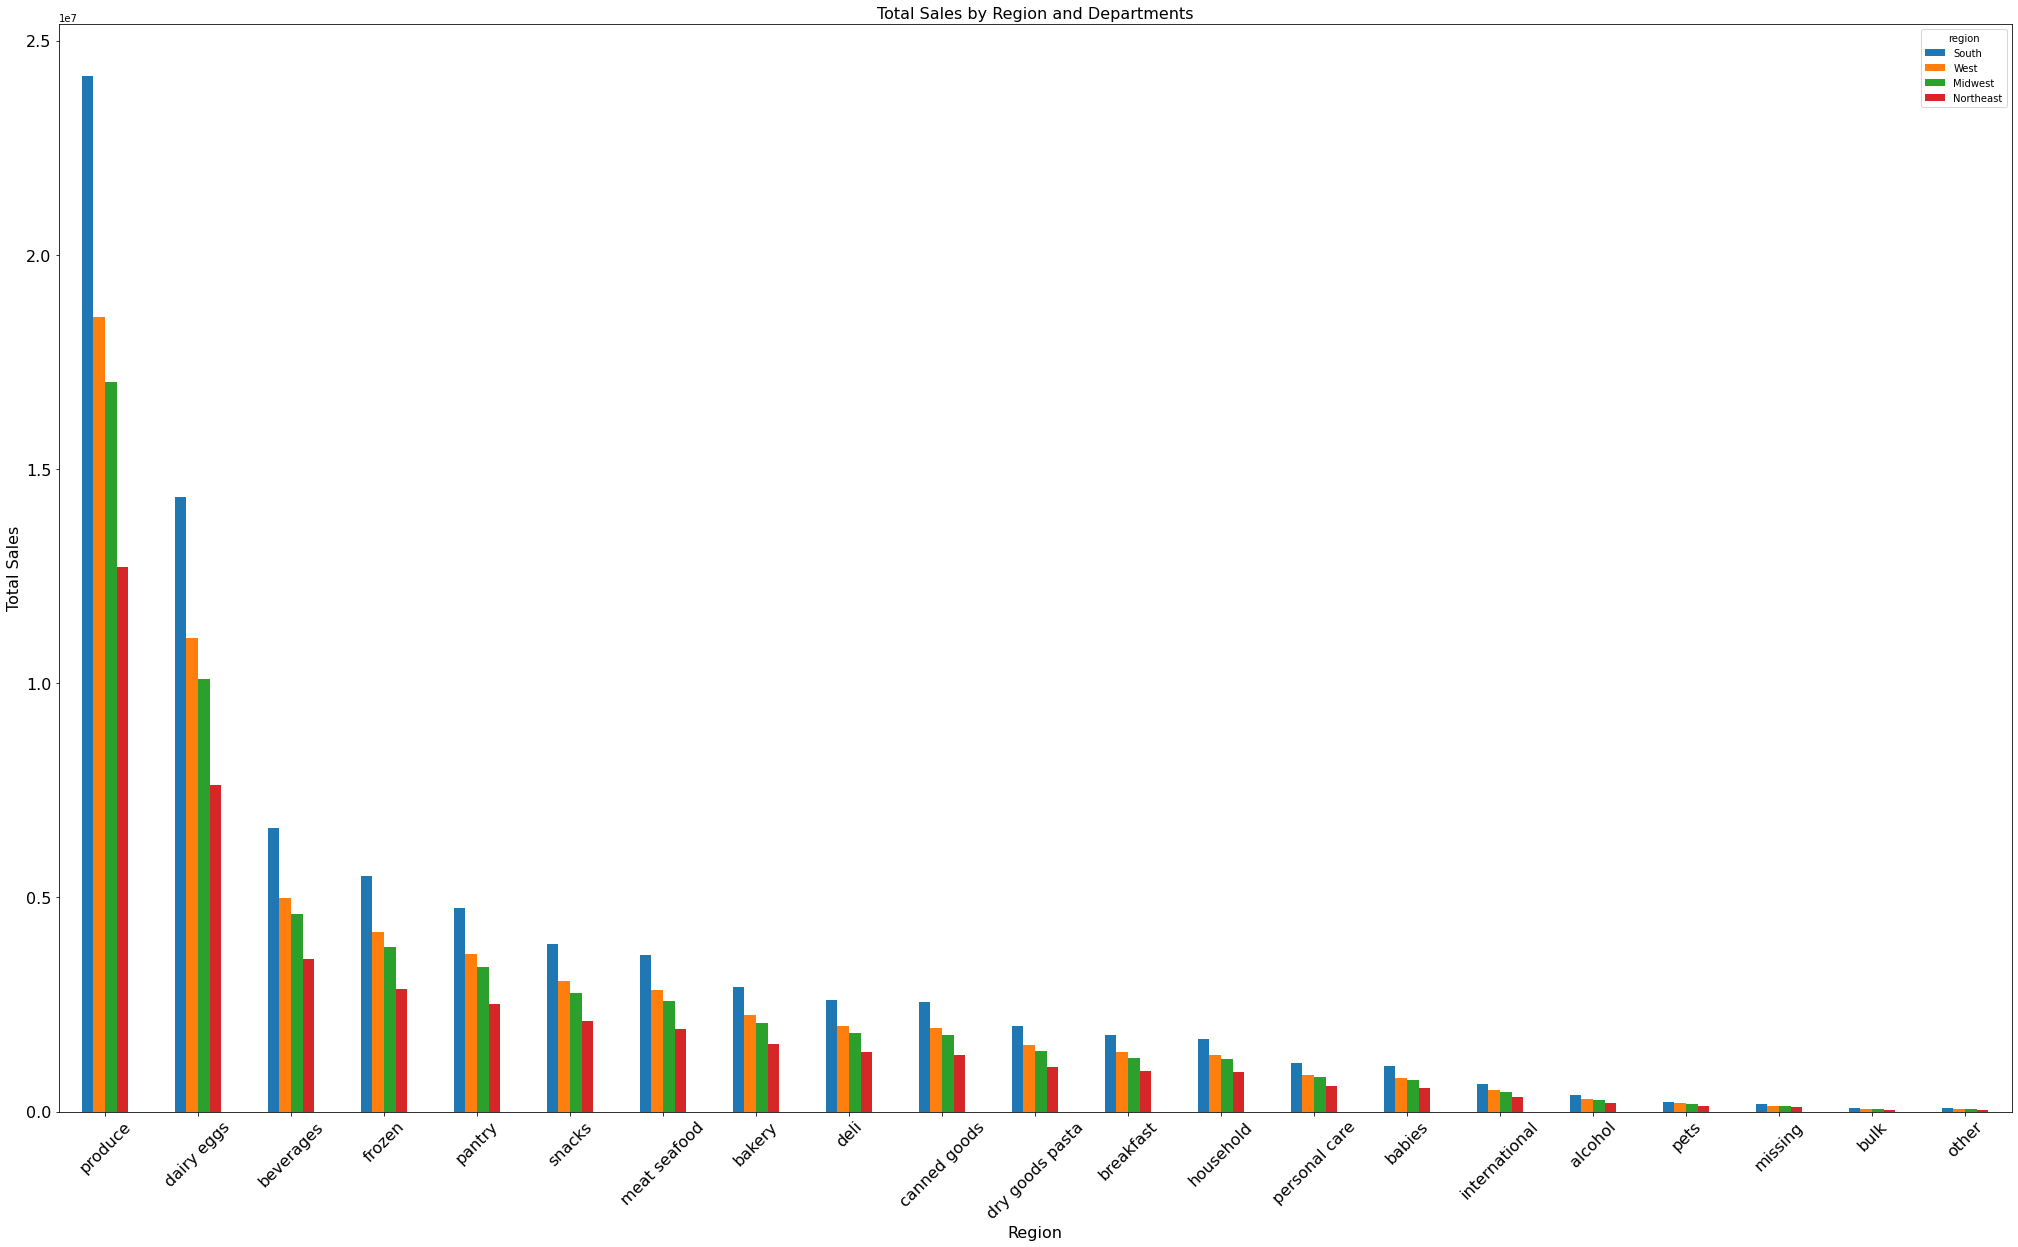

In [274]:
bar_sales_per_dept_region = sales_per_dept_region.plot.bar(x='department', rot=45, figsize=(35,20), fontsize=16)

plt.title('Total Sales by Region and Departments', fontsize=16)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.show();

### 7. Products range distribution

Text(0.5, 1.0, 'Product Prices Composition by Availability')

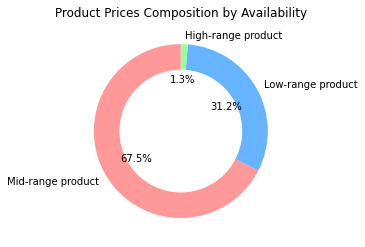

In [279]:
# Creating product distribution 

labels = 'Mid-range product', 'Low-range product', 'High-range product'
colors = ['#ff9999','#66b3ff','#99ff99']

prices_dist1 = df['price_range_loc'].value_counts()
pie_prices_dist = prices_dist1.plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Product Prices Composition by Availability')

In [280]:
prices_dist2 = df.groupby('price_range_loc').agg({'order_number': 'sum'}).sort_values(by = 'order_number', ascending = False).reset_index()
prices_dist2

,price_range_loc,order_number
0,Mid-range product,"373,342,754.0"
1,Low-range product,"172,308,188.0"
2,High-range product,"6,575,470.0"


Text(0.5, 1.0, 'Product Prices Distribution by Order')

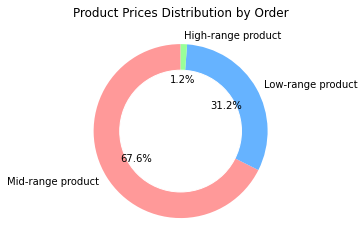

In [294]:
# Creating product prices distribution 

labels = 'Mid-range product', 'Low-range product', 'High-range product'
colors = ['#ff9999','#66b3ff','#99ff99']


pie_prices_dist2 = prices_dist2['order_number'].plot.pie(label='', labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Product Prices Distribution by Order')

### 8. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [282]:
df['days_since_prior_order'].describe()

count   30,964,564.0
mean             9.5
std              8.4
min             -1.0
25%              4.0
50%              7.0
75%             14.0
max             30.0
Name: days_since_prior_order, dtype: float64

Here we can see that there is -1 as the minimum value. It is used to flag customers who dont have any prior order history. Thus, customers associated with -1 will be dropped.

In [283]:
df_habit= df[df['days_since_prior_order'] != -1]
df_habit['days_since_prior_order'].describe()

count   29,303,281.0
mean            10.0
std              8.4
min              0.0
25%              5.0
50%              7.0
75%             14.0
max             30.0
Name: days_since_prior_order, dtype: float64

In [284]:
spend_habit = df_habit.groupby('loyalty_flag').agg({'days_since_prior_order': 'mean', 'prices': 'mean'}).sort_values(by = 'days_since_prior_order', ascending = False).reset_index()
spend_habit = spend_habit.rename(columns = {'days_since_prior_order': 'avg_days_since_prior_order', 'prices': 'avg_prices'})
spend_habit

,loyalty_flag,avg_days_since_prior_order,avg_prices
0,New customer,17.6,7.8
1,Regular customer,12.2,7.8
2,Loyal customer,6.0,7.8


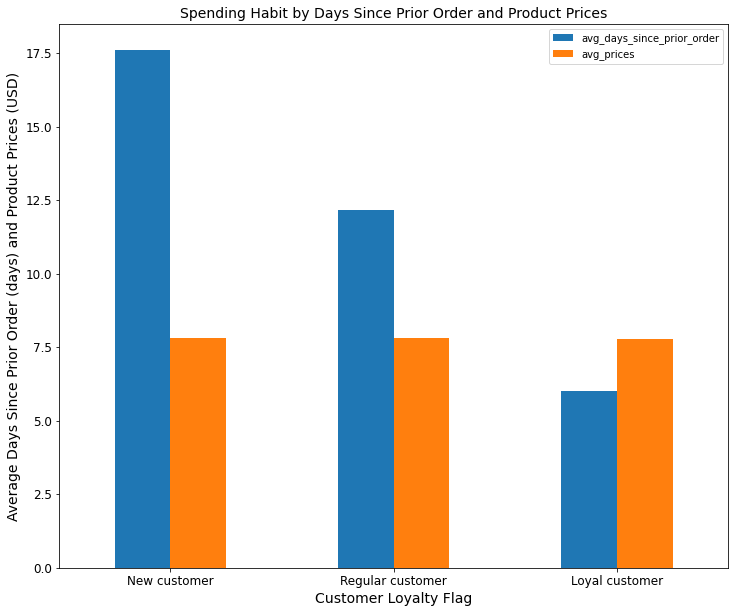

In [285]:
bar_avgspend_habit = spend_habit.plot.bar(x='loyalty_flag', rot=0, figsize=(12,10), fontsize=12)

plt.title('Spending Habit by Days Since Prior Order and Product Prices', fontsize=14)
plt.xlabel('Customer Loyalty Flag', fontsize=14)
plt.ylabel('Average Days Since Prior Order (days) and Product Prices (USD)', fontsize=14)
plt.show();

In [286]:
spend_habit2 = df_habit.groupby('loyalty_flag').agg({'days_since_prior_order': 'max', 'prices': 'max'}).sort_values(by = 'days_since_prior_order', ascending = False).reset_index()
spend_habit2 = spend_habit2.rename(columns = {'days_since_prior_order': 'max_days_since_prior_order', 'prices': 'max_prices'})
spend_habit2

,loyalty_flag,max_days_since_prior_order,max_prices
0,Loyal customer,30.0,25.0
1,New customer,30.0,25.0
2,Regular customer,30.0,25.0


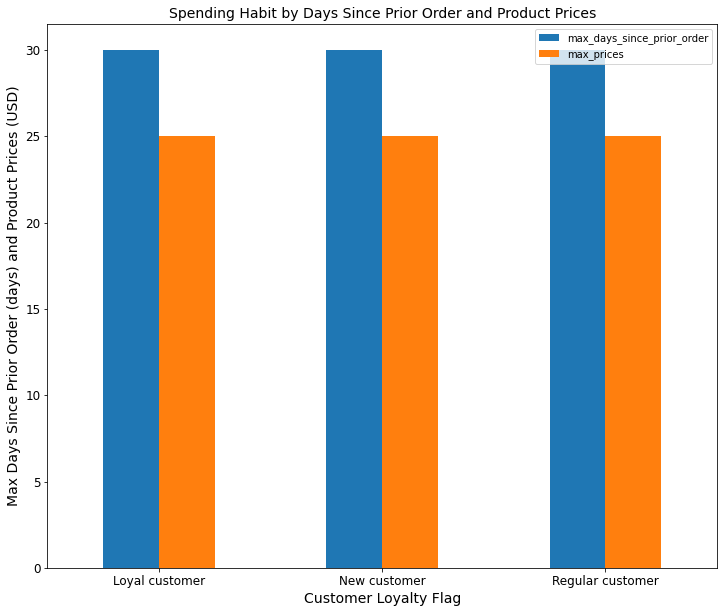

In [287]:
bar_maxspend_habit = spend_habit2.plot.bar(x='loyalty_flag', rot=0, figsize=(12,10), fontsize=12)

plt.title('Spending Habit by Days Since Prior Order and Product Prices', fontsize=14)
plt.xlabel('Customer Loyalty Flag', fontsize=14)
plt.ylabel('Max Days Since Prior Order (days) and Product Prices (USD)', fontsize=14)
plt.show();

#### 9. Comparing customer profiles with regions and departments

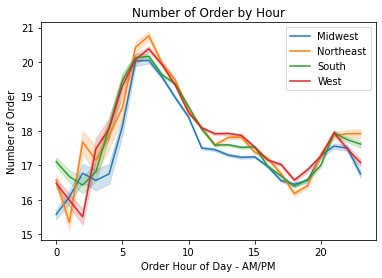

In [208]:
line_order_hour = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'order_number', hue = 'region')

plt.xlabel('Order Hour of Day - AM/PM')
plt.ylabel('Number of Order')
plt.title('Number of Order by Hour')
plt.legend()
plt.show()

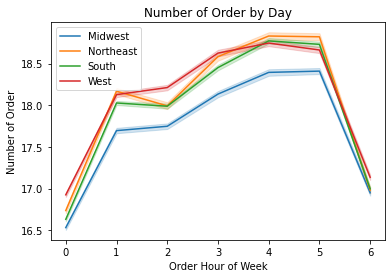

In [257]:
line_order_week = sns.lineplot(data = df, x = 'order_day_of_week', y = 'order_number', hue = 'region')

plt.xlabel('Order Hour of Week')
plt.ylabel('Number of Order')
plt.title('Number of Order by Day')
plt.legend()
plt.show()

The line plot shows that the order peak usually occurs in the morning and that applies generally in all those 4 regions.

In [112]:
df_reg_dept_sales = df.groupby(['region', 'department']).agg({'order_number': 'sum'}).unstack()
df_reg_dept_sales

order_number                                                   \
department      alcohol      babies      bakery    beverages   breakfast   
region                                                                     
Midwest       550,842.0 1,893,168.0 4,571,470.0 10,521,065.0 2,678,215.0   
Northeast     405,462.0 1,406,505.0 3,597,052.0  8,422,198.0 2,076,263.0   
South         778,565.0 2,814,920.0 6,635,755.0 15,367,855.0 3,883,339.0   
West          584,113.0 2,038,702.0 5,209,922.0 11,729,713.0 3,081,924.0   

                                                                            \
department      bulk canned goods   dairy eggs        deli dry goods pasta   
region                                                                       
Midwest    167,876.0  3,931,489.0 21,848,543.0 4,008,871.0     3,160,092.0   
Northeast  116,556.0  3,026,949.0 16,929,055.0 3,070,168.0     2,379,969.0   
South      224,816.0  5,736,809.0 31,703,248.0 5,686,434.0     4,535,146.0   
West       186,451.0  4,443,070.0 24,389,435.0 4,445,062.0     3,599,397.0   

                                                                          \
department       frozen   household international meat seafood   missing   
region                                                                     
Midwest     7,947,523.0 2,711,466.0   1,013,272.0  2,591,472.0 376,993.0   
Northeast   5,912,025.0 2,100,495.0     773,009.0  1,968,315.0 284,687.0   
South      11,531,424.0 3,743,061.0   1,445,583.0  3,705,397.0 519,174.0   
West        8,897,768.0 2,949,867.0   1,164,703.0  2,920,600.0 391,799.0   

                                                                        \
department     other       pantry personal care      pets      produce   
region                                                                   
Midwest    141,838.0  7,230,849.0   1,699,691.0 335,287.0 39,025,162.0   
Northeast  113,855.0  5,461,911.0   1,275,955.0 308,402.0 29,482,700.0   
South      215,048.0 10,205,536.0   2,390,894.0 467,629.0 56,077,810.0   
West       151,977.0  7,992,985.0   1,818,400.0 377,263.0 43,342,106.0   

                         
department       snacks  
region                   
Midwest    11,417,981.0  
Northeast   8,825,241.0  
South      16,330,473.0  
West       12,752,302.0

In [113]:
df_reg_dept_sales.columns = ['_'.join(col) for col in df_reg_dept_sales.columns.values]
df_reg_dept_sales.columns = departments
df_reg_dept_sales = df_reg_dept_sales.reset_index()
df_reg_dept_sales

,region,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing
0,Midwest,"550,842.0","1,893,168.0","4,571,470.0","10,521,065.0","2,678,215.0","167,876.0","3,931,489.0","21,848,543.0","4,008,871.0","3,160,092.0","7,947,523.0","2,711,466.0","1,013,272.0","2,591,472.0","376,993.0","141,838.0","7,230,849.0","1,699,691.0","335,287.0","39,025,162.0","11,417,981.0"
1,Northeast,"405,462.0","1,406,505.0","3,597,052.0","8,422,198.0","2,076,263.0","116,556.0","3,026,949.0","16,929,055.0","3,070,168.0","2,379,969.0","5,912,025.0","2,100,495.0","773,009.0","1,968,315.0","284,687.0","113,855.0","5,461,911.0","1,275,955.0","308,402.0","29,482,700.0","8,825,241.0"
2,South,"778,565.0","2,814,920.0","6,635,755.0","15,367,855.0","3,883,339.0","224,816.0","5,736,809.0","31,703,248.0","5,686,434.0","4,535,146.0","11,531,424.0","3,743,061.0","1,445,583.0","3,705,397.0","519,174.0","215,048.0","10,205,536.0","2,390,894.0","467,629.0","56,077,810.0","16,330,473.0"
3,West,"584,113.0","2,038,702.0","5,209,922.0","11,729,713.0","3,081,924.0","186,451.0","4,443,070.0","24,389,435.0","4,445,062.0","3,599,397.0","8,897,768.0","2,949,867.0","1,164,703.0","2,920,600.0","391,799.0","151,977.0","7,992,985.0","1,818,400.0","377,263.0","43,342,106.0","12,752,302.0"


In [114]:
sales_per_region = df_reg_dept_sales.T
new_header = sales_per_region.iloc[0]
sales_per_region = sales_per_region.iloc[1:]
sales_per_region.columns = new_header
sales_per_region = sales_per_region.sort_values(['South', 'Midwest', 'West', 'Northeast'], ascending = False)
sales_per_region

region,Midwest,Northeast,South,West
deli,"39,025,162.0","29,482,700.0","56,077,810.0","43,342,106.0"
pets,"21,848,543.0","16,929,055.0","31,703,248.0","24,389,435.0"
missing,"11,417,981.0","8,825,241.0","16,330,473.0","12,752,302.0"
produce,"10,521,065.0","8,422,198.0","15,367,855.0","11,729,713.0"
personal care,"7,947,523.0","5,912,025.0","11,531,424.0","8,897,768.0"
household,"7,230,849.0","5,461,911.0","10,205,536.0","7,992,985.0"
bakery,"4,571,470.0","3,597,052.0","6,635,755.0","5,209,922.0"
beverages,"3,931,489.0","3,026,949.0","5,736,809.0","4,443,070.0"
dry goods pasta,"4,008,871.0","3,070,168.0","5,686,434.0","4,445,062.0"
bulk,"3,160,092.0","2,379,969.0","4,535,146.0","3,599,397.0"


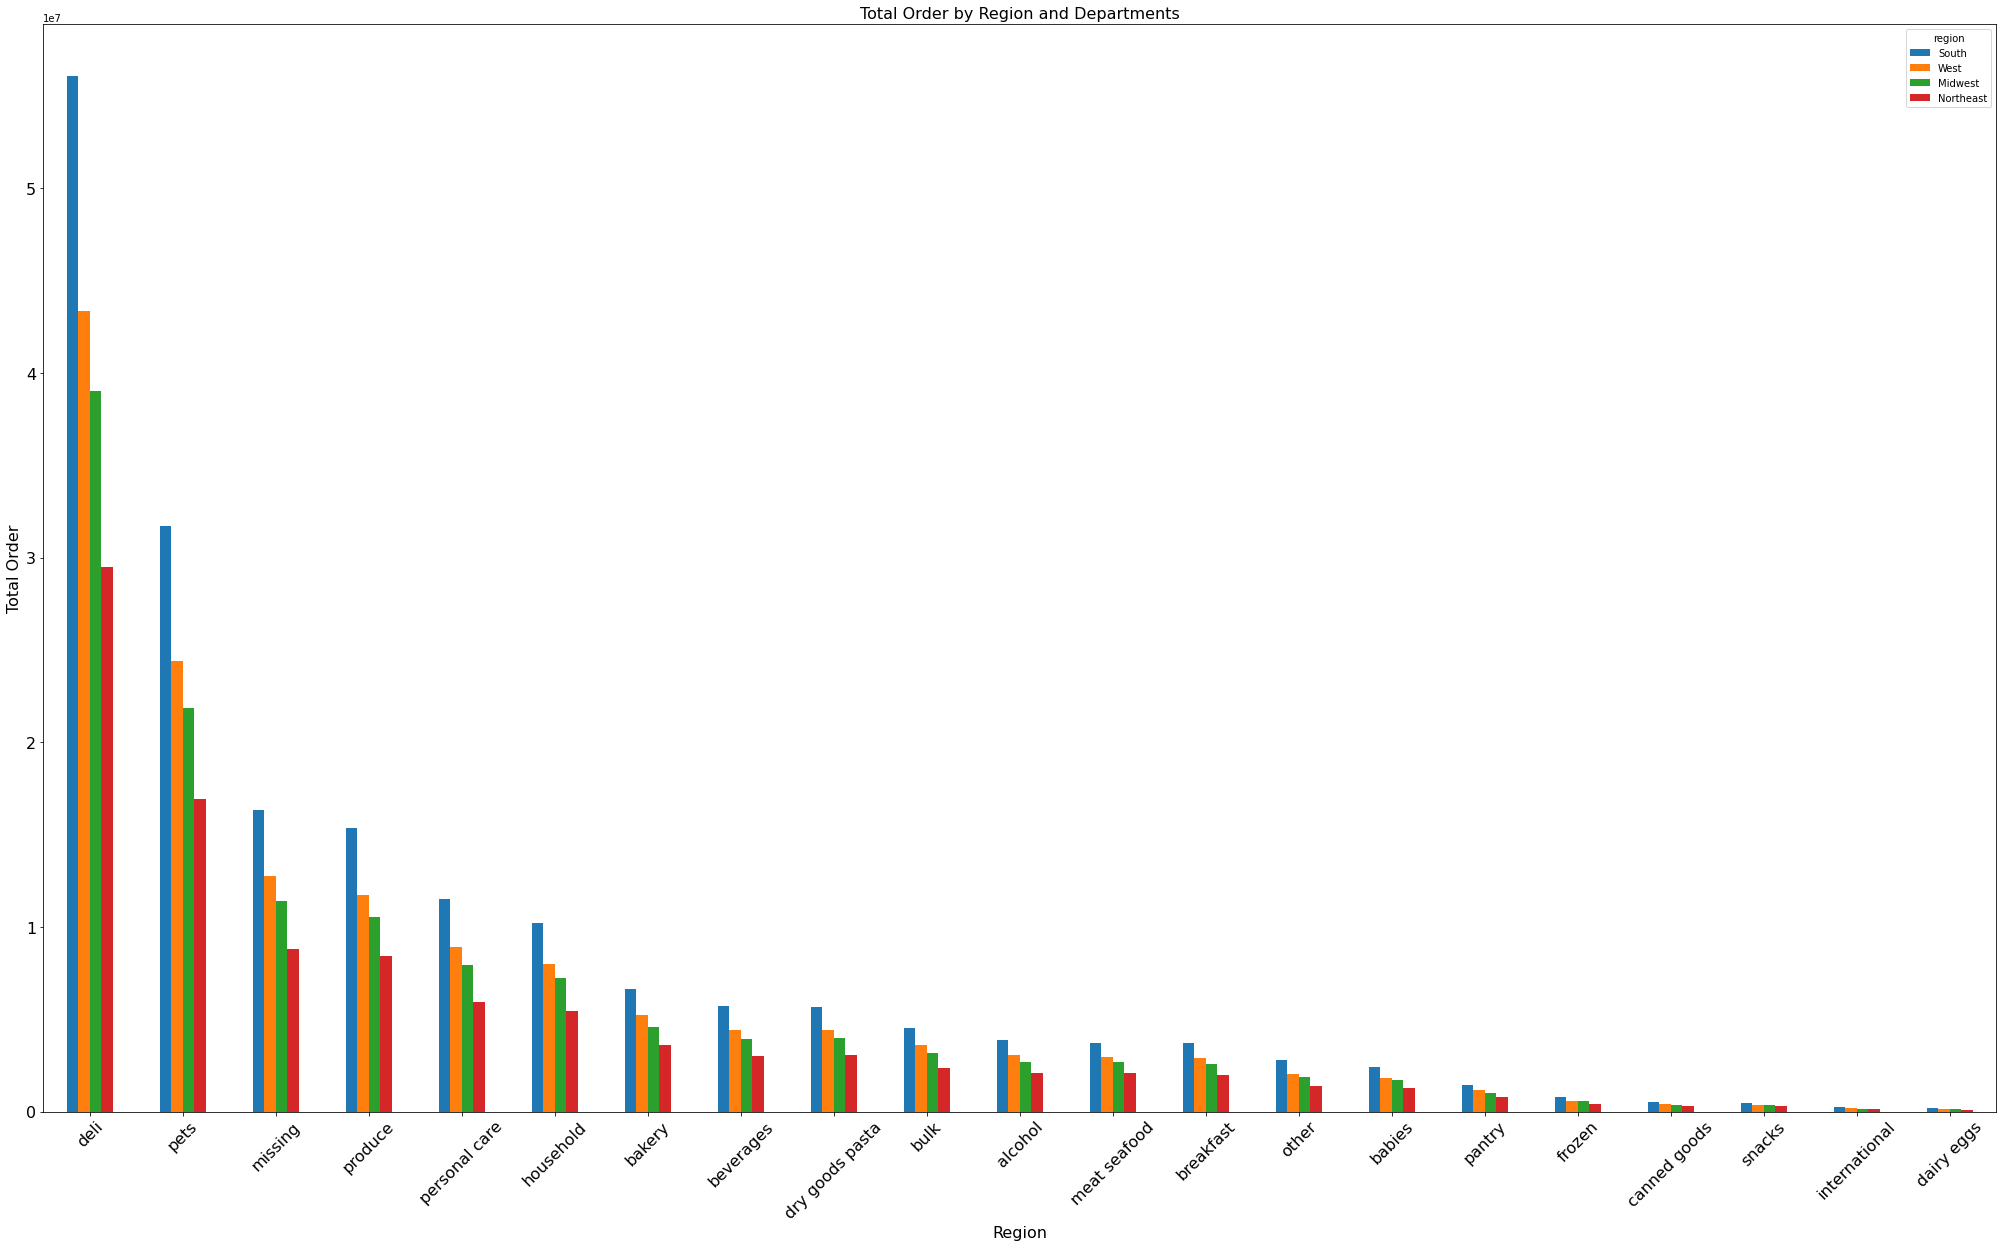

In [115]:
new_cols = ['South', 'West', 'Midwest', 'Northeast']
sales_per_region = (sales_per_region[new_cols]).reset_index()
sales_per_region = sales_per_region.rename(columns= {'index': 'department'})
sales_per_region

bar_sales_per_region = sales_per_region.plot.bar(x='department', rot=45, figsize=(35,20), fontsize=16)

plt.title('Total Order by Region and Departments', fontsize=16)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Total Order', fontsize=16)
plt.show();

It is so surprising when total sales is broken down into region and departments. Deli department has the highest sales among other department in all regions.
Deli (delicatessen ) is where ready-to-eat food products (such as cooked meats and prepared salads) are sold.

#### 9. Exporting visualizations as image files

In [ ]:
bar_group_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_group_range.png'))
bar_sales_per_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_per_region.png'))

pie_gender_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_gender_group.png'))
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_income.png'))

hist_orders_per_famstats.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_per_famstats.png'))
scat_income_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_income_order.png'))

bar_income_per_famstats.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_per_famstats.png'))
bar_sales_per_dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_per_dept_region.png'))

pie_cust_per_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_cust_per_region.png'))
pie_cust_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_cust_dist.png'))
pie_cust_dist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_cust_dist2.png'))

bar_orders_per_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_per_depts.png'))
bar_sales_per_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_per_depts.png'))
bar_sales_per_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_per_age_group.png'))

pie_prices_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_prices_dist.png'))
pie_prices_dist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_prices_dist2.png'))

bar_avgspend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_avgspend_habit.png'))
bar_maxspend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_maxspend_habit.png'))

line_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour.png'))
line_order_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_week.png'))

In [17]:
gc.collect()

0